<a href="https://colab.research.google.com/github/Moshiii/pytorch_snippet/blob/master/sum_10_pytorch_one_layer_3_node.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import torch
import random
from torchsummary import summary
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def one_hot_to_num(one_hot):
  return [i for i, j in enumerate(a)if j == max(a)]
def npify_tsr(tsr):
  numpy.set_printoptions(suppress=True)
  return numpy.round(tsr.detach().numpy(), decimals=2)

def show_tensor(dataset,v_range=None,idx=0):
  ds=dataset.numpy()
  plt.figure(idx,figsize=(5, 5))
  print(idx)
  if v_range:
    sns.heatmap(ds, annot=True, linewidths=.5, vmin=v_range[0], vmax=v_range[1])
  else:
    sns.heatmap(ds, annot=True, linewidths=.5)


In [0]:
class Feedforward(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Feedforward, self).__init__()
    self.input_size = input_size
    self.hidden_size  = hidden_size
    self.output_size = output_size 
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.relu = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(self.hidden_size, output_size)
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    self.layer_hidden = self.fc1(x)
    self.layer_hidden_relu = self.sigmoid(self.layer_hidden)
    self.layer_output = self.fc2(self.layer_hidden_relu)
    self.layer_output_sig = self.sigmoid(self.layer_output)
    return self.layer_output_sig

In [0]:
class ModelLog:

  def __init__(self, model):
      self.rec_dic={0:[],1:[]}
      self.model = model
      
  def model_weight_vis(self):
      model_list = [m for m in self.model.modules()]
      w_layer_1 = model_list[1].weight.data.clone()
      model_list[1].bias.data
      w_layer_2 = model_list[3].weight.data.clone()
      self.rec_dic[0].append(w_layer_1.clone())
      self.rec_dic[1].append(w_layer_2.clone())

  def dump_all_weights(self):
    self.dump_weight(self.rec_dic[0])
    self.dump_weight(self.rec_dic[1])

  def dump_weight(self,tensor_list):
    idx=0
    for i,t in enumerate(tensor_list):
      if i>1:
        idx+=1
        show_tensor((tensor_list[i]-tensor_list[i-1])*100/tensor_list[i],idx=idx)

In [0]:
def get_sum_data(n_samples=55,shuffle=True):
  numbers=list(range(0,10))
  pair=[]
  for a in numbers:
    for b in numbers:
      if a+b<10:
        y_scatter=[0]*10
        y_scatter[a+b]=1
        pair+=[[[a/10,b/10],(a+b)/10]]
  random.shuffle(pair)
  pair=pair[:n_samples] 
  x_train = [x[0] for x in pair]
  y_train = [y[1] for y in pair]
  return x_train, y_train

In [0]:
FF_model = Feedforward(2, 3, 1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(FF_model.parameters(), lr = 0.015)

In [0]:
x_train, y_train = get_sum_data(55)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

x_test, y_test = get_sum_data(5)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)

In [8]:
FF_model.eval()
y_pred = FF_model(x_test)

before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.6985764503479004


In [27]:
FF_model.train()
epoch = 100000

record_tracker= ModelLog(FF_model)

for epoch in range(epoch):
    FF_model.train()
    optimizer.zero_grad()
    # record_tracker.model_weight_vis()
    y_pred = FF_model(x_train)# foward    
    loss = criterion(y_pred.squeeze(), y_train)
    # train_accuracy = 100 * correct / 5
    # print(train_accuracy)

    loss.backward()
    optimizer.step()

    if epoch % 2000 == 0:
      record_tracker.model_weight_vis()
      print('Epoch {}: train loss: {}'.format(epoch, loss.item())) 
      FF_model.eval()
      y_pred = FF_model(x_test) 
      before_train = criterion(y_pred.squeeze(), y_test)
      print('Test loss before training================' , before_train.item())
# record_tracker.dump_all_weights()

Epoch 0: train loss: 0.6626535654067993
Test loss before training================ 0.743435263633728
Epoch 2000: train loss: 0.6565696597099304
Test loss before training================ 0.7325037121772766
Epoch 4000: train loss: 0.6476367115974426
Test loss before training================ 0.7155050039291382
Epoch 6000: train loss: 0.635246992111206
Test loss before training================ 0.6908981204032898
Epoch 8000: train loss: 0.6194904446601868
Test loss before training================ 0.6587375402450562
Epoch 10000: train loss: 0.6017265319824219
Test loss before training================ 0.6219716668128967
Epoch 12000: train loss: 0.5843818783760071
Test loss before training================ 0.5859414339065552
Epoch 14000: train loss: 0.5697316527366638
Test loss before training================ 0.5556008219718933
Epoch 16000: train loss: 0.5588158965110779
Test loss before training================ 0.5331336259841919
Epoch 18000: train loss: 0.5514262914657593
Test loss before trai

In [29]:
FF_model.eval()
y_pred = FF_model(x_test)
after_train = criterion(y_pred.squeeze(), y_test)
print("x_test")
print(npify_tsr(x_test))
# print("w_1")
# print(npify_tsr(record_tracker.rec_dic[0][-1]))
# print("x_test*w_1")
# print(npify_tsr(FF_model.layer_hidden))
print("relu(x_test*w_1)")
print(npify_tsr(FF_model.layer_hidden_relu))
# print("w_2")
# print(npify_tsr(record_tracker.rec_dic[1][-1]))
# print("relu(x_test*w_1)*w_2")
# print(npify_tsr(FF_model.layer_output))
print("sig(relu(x_test*w_1)*w_2)")
print(npify_tsr(FF_model.layer_output_sig))
for a in y_pred:
  res = numpy.around(10*a.detach().numpy())
  print(res)




x_test
[[0.5 0. ]
 [0.1 0.1]
 [0.2 0.1]
 [0.2 0.7]
 [0.1 0. ]]
relu(x_test*w_1)
[[0.37 0.45 0.44]
 [0.36 0.58 0.23]
 [0.37 0.54 0.29]
 [0.62 0.44 0.75]
 [0.33 0.6  0.18]]
sig(relu(x_test*w_1)*w_2)
[[0.49]
 [0.19]
 [0.26]
 [0.87]
 [0.14]]
[5.]
[2.]
[3.]
[9.]
[1.]


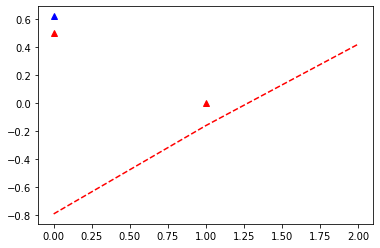

In [11]:
import matplotlib.pyplot as plt
plt.plot(x_test[0],"r^")
plt.plot(npify_tsr(FF_model.layer_hidden)[0],'r--')
# plt.plot(npify_tsr(FF_model.layer_hidden_relu)[0],'r^')

plt.plot(npify_tsr(FF_model.layer_output)[0],'b--')
plt.plot(npify_tsr(FF_model.layer_output_sig)[0],'b^')

plt.show()

红线波动近似随机。 这里面我用了3个node来学习两个数字十以内的加法。结果发现跟100的比较起来没有本质区别 说明有的时候多余的权重只会让信息更加稀疏降低效率。 这个发现也印证了模型压缩的可行性。这算是这次实验的发现。

In [26]:
record_tracker.dump_all_weights()

0


TypeError: ignored

<Figure size 360x360 with 0 Axes>

In [0]:
tensor_list = record_tracker.rec_dic[1]
idx=0
for i,t in enumerate(tensor_list):
  idx+=1
  if i>1:
    # show_tensor((tensor_list[i]-tensor_list[i-1])/tensor_list[i],idx=idx)
    show_tensor(tensor_list[i],idx=idx)
    # plt.plot_surface(range(10), range(10), tensor_list[i])

0
1


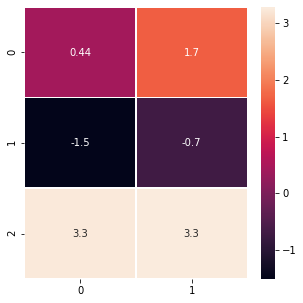

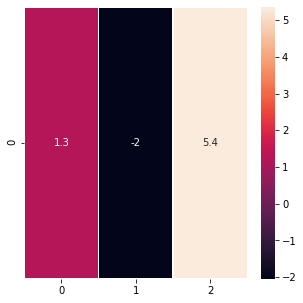

In [32]:
tensor_list = record_tracker.rec_dic[0]
show_tensor(tensor_list[-1],idx=0)
tensor_list = record_tracker.rec_dic[1]
show_tensor(tensor_list[-1],idx=1)


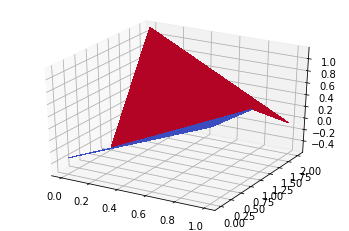

In [24]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0,2,1)
Y = np.arange(0,3,1)
X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, tensor_list[i].numpy(), cmap=cm.coolwarm, linewidth=0, antialiased=False)

# # Customize the z axis.
# ax.set_zlim(-10, 10)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()
# ax.view_init(30, 20)
plt.show()
# plt.pause(.001)